In [119]:
import os
import shutil 
import numpy as np
import pandas as pd   
from sklearn.model_selection import train_test_split   

In [120]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
   creating: Data/hypodontia/
  inflating: __MACOSX/Data/._hypodontia  
  inflating: Data/.DS_Store          
  inflating: __MACOSX/Data/._.DS_Store  
   creating: Data/Tooth Discoloration/
  inflating: __MACOSX/Data/._Tooth Discoloration  
   creating: Data/Ulcer/
  inflating: __MACOSX/Data/._Ulcer   
   creating: Data/Gingivitis/
  inflating: __MACOSX/Data/._Gingivitis  
   creating: Data/Caries/
  inflating: __MACOSX/Data/._Caries  
   creating: Data/Calculus/
  inflating: __MACOSX/Data/._Calculus  
  inflating: Data/hypodontia/(819).jpg  
  inflating: __MACOSX/Data/hypodontia/._(819).jpg  
  inflating: Data/hypodontia/(1007).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1007).JPG  
  inflating: Data/hypodontia/(24).JPG  
  inflating: __MACOSX/Data/hypodontia/._(24).JPG  
  inflating: Data/hypodontia/(1142).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1142).JPG  
  inflating: Data/hypodontia/(726).JPG  
 

# Data PreProcessing

In [121]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'Data'
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Create directories for the split data
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_dir, train_dir, val_dir, test_dir, test_size=0.20):
    # Get filenames
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    test_files, val_files = train_test_split(test_files, test_size=0.50, random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

# Iterate over each class and split the data
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create class directories in train, val, and test
    for directory in [train_dir, val_dir, test_dir]:
        class_directory = os.path.join(directory, class_name)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

    # Split and copy files
    split_data(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

print("Data split into train, validation, and test sets.")

Data split into train, validation, and test sets.


## Data Distribution

In [122]:
# Directory paths
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Classes
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

# Function to calculate size of each class
def calculate_class_sizes(dir_path, classes):
    return {class_name: len(os.listdir(os.path.join(dir_path, class_name))) for class_name in classes}

# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 4448 images
 - Calculus: 1036 images (23.29% of train set)
 - Caries: 175 images (3.93% of train set)
 - Gingivitis: 1879 images (42.24% of train set)
 - hypodontia: 1000 images (22.48% of train set)
 - Ulcer: 212 images (4.77% of train set)
 - Tooth Discoloration: 146 images (3.28% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


/var/folders/hn/5fpc0nwn3l5dqrb9wq8zr_w80000gn/T/ipykernel_8706/2005837930.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names, rotation=45, ha='right')


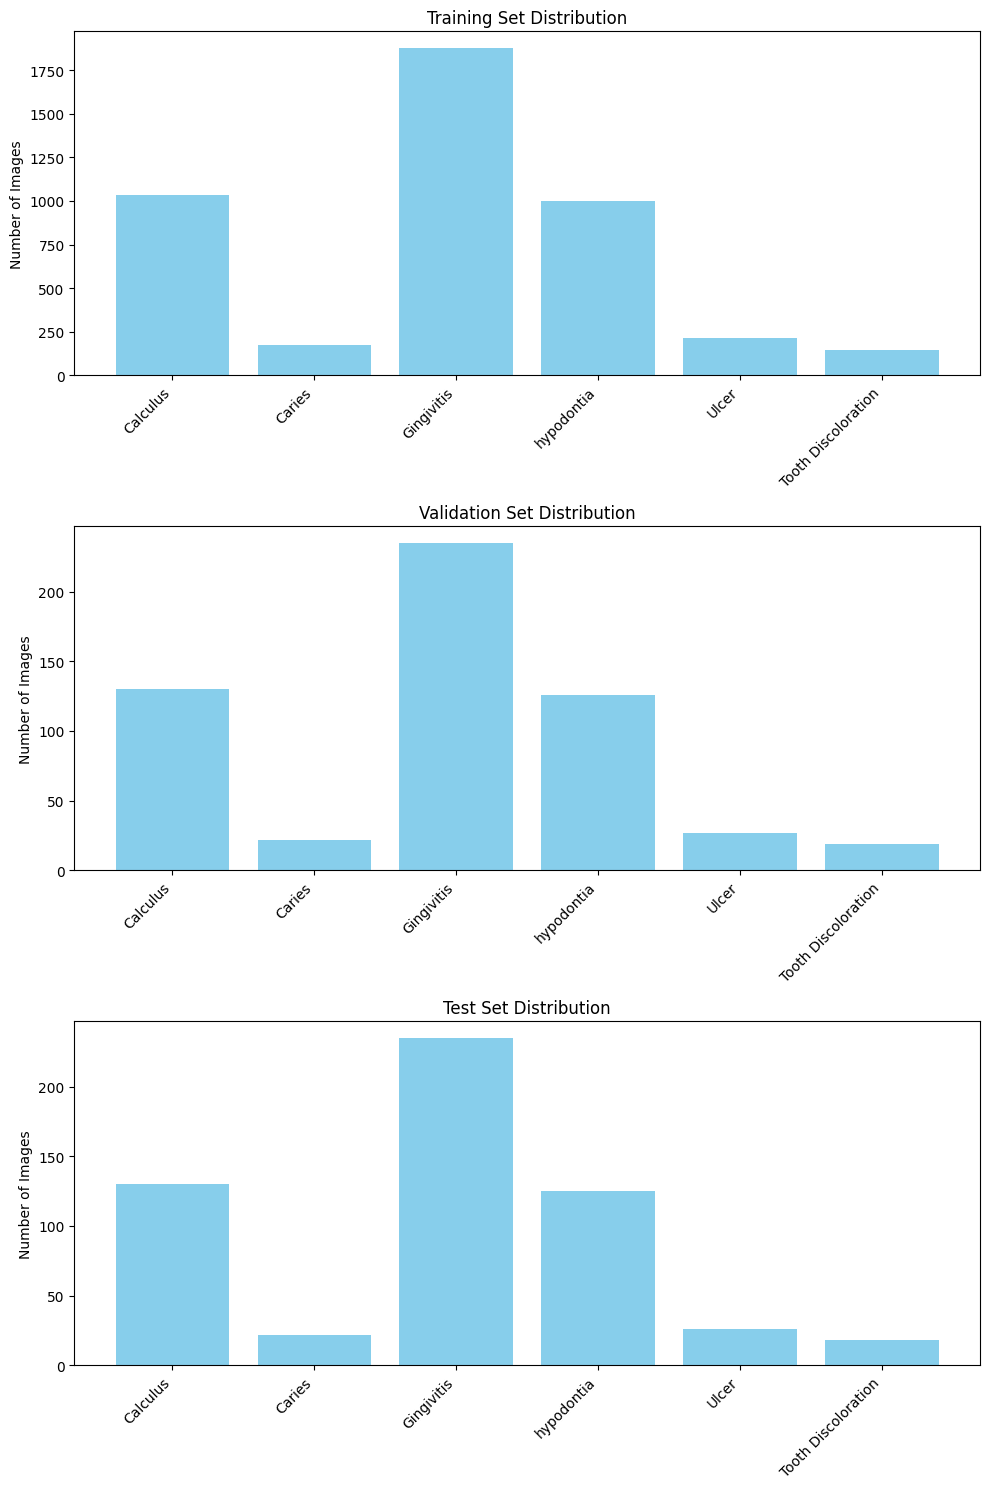

In [123]:
import matplotlib.pyplot as plt

# Assuming the sizes are already calculated as in your previous code
# train_sizes, val_sizes, test_sizes

# Data for plotting
class_names = list(train_sizes.keys())
train_counts = list(train_sizes.values())
val_counts = list(val_sizes.values())
test_counts = list(test_sizes.values())

# Function to create a bar plot
def create_bar_plot(ax, counts, title):
    ax.bar(class_names, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylabel('Number of Images')

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot data
create_bar_plot(axes[0], train_counts, 'Training Set Distribution')
create_bar_plot(axes[1], val_counts, 'Validation Set Distribution')
create_bar_plot(axes[2], test_counts, 'Test Set Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [65]:
#pip install keras

In [66]:
#pip install tensorflow

## OverSampling (Class Imbalance Correction)

In [124]:
import random
import tensorflow as tf        
import keras 
from keras.preprocessing.image import ImageDataGenerator 

train_dir = 'Train'

# Function to perform oversampling
def oversample_class(class_dir, target_count):
    files = os.listdir(class_dir)
    while len(files) < target_count:
        chosen_file = random.choice(files)
        new_file = f'oversampled_{random.randint(1, 10000)}_{chosen_file}'
        shutil.copy(os.path.join(class_dir, chosen_file), os.path.join(class_dir, new_file))
        files.append(new_file)

target_counts = {
    'Caries': 1000,
    'Ulcer': 1000,
    'Tooth Discoloration': 1000
}

for class_name, target_count in target_counts.items():
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_count)


In [125]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


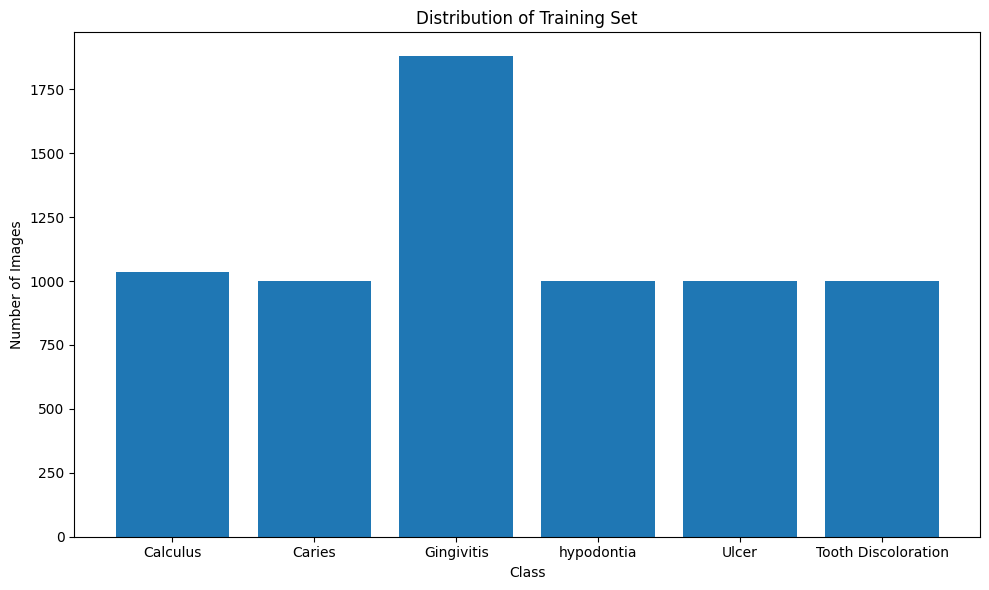

In [126]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

## Data Visualization

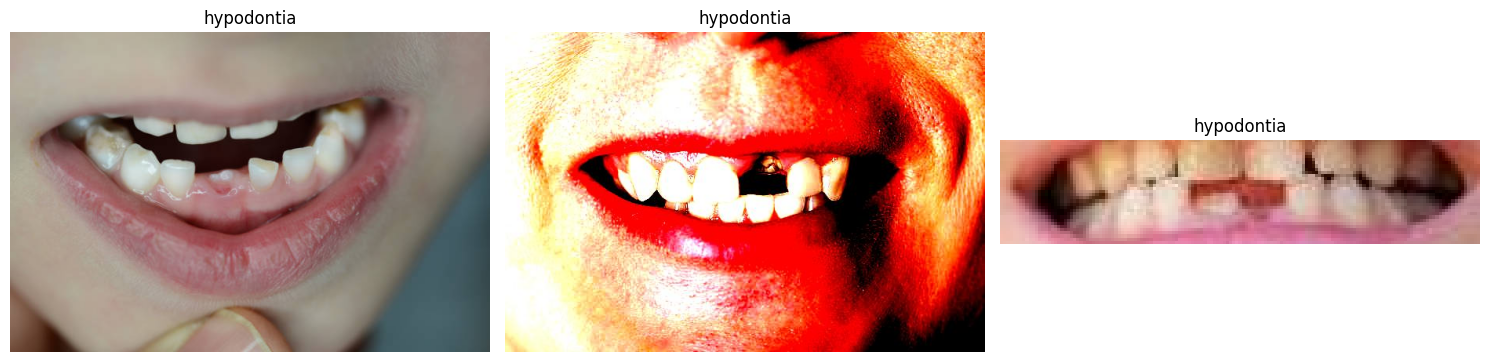

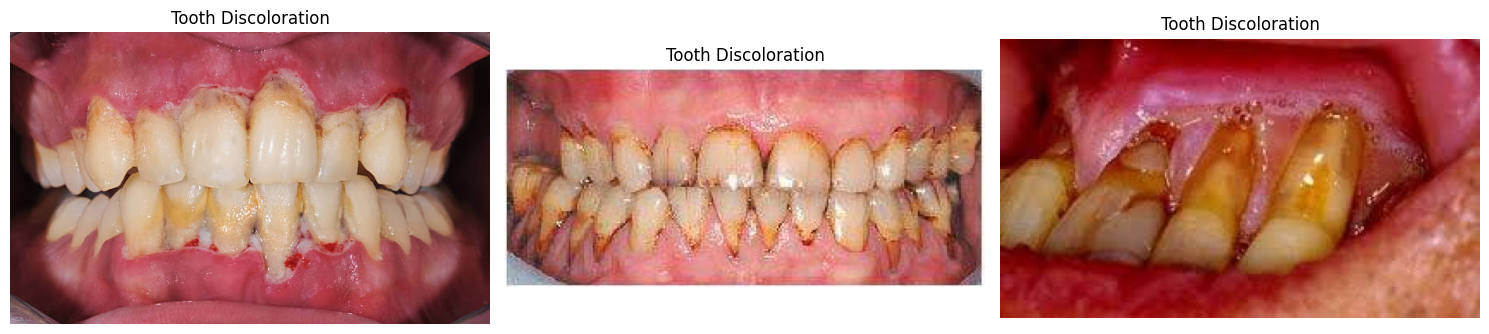

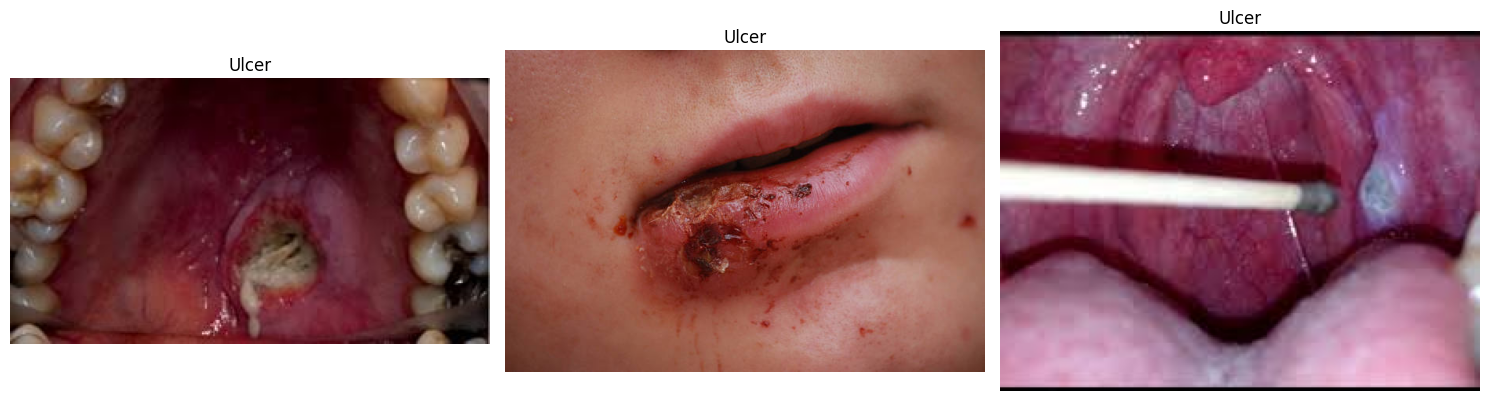

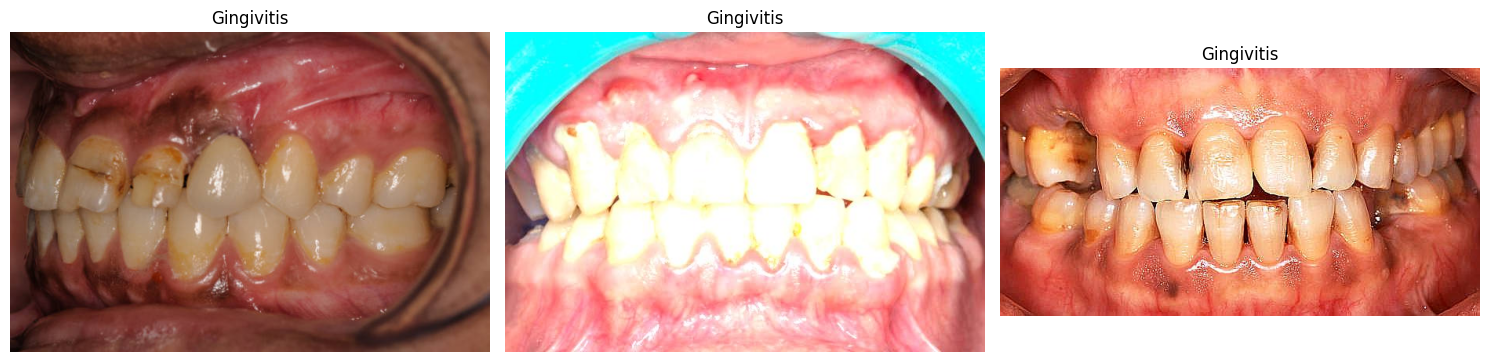

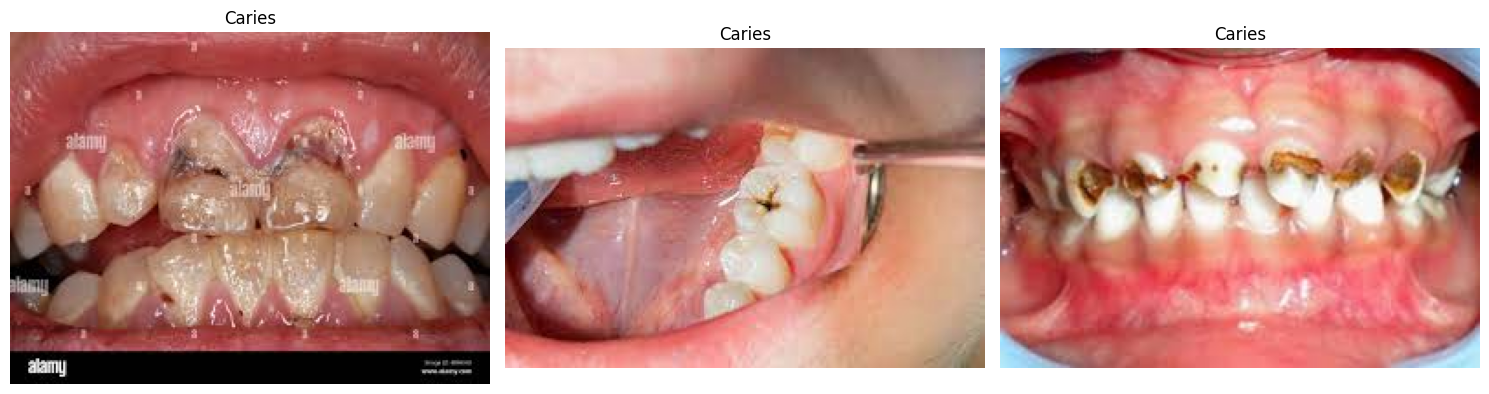

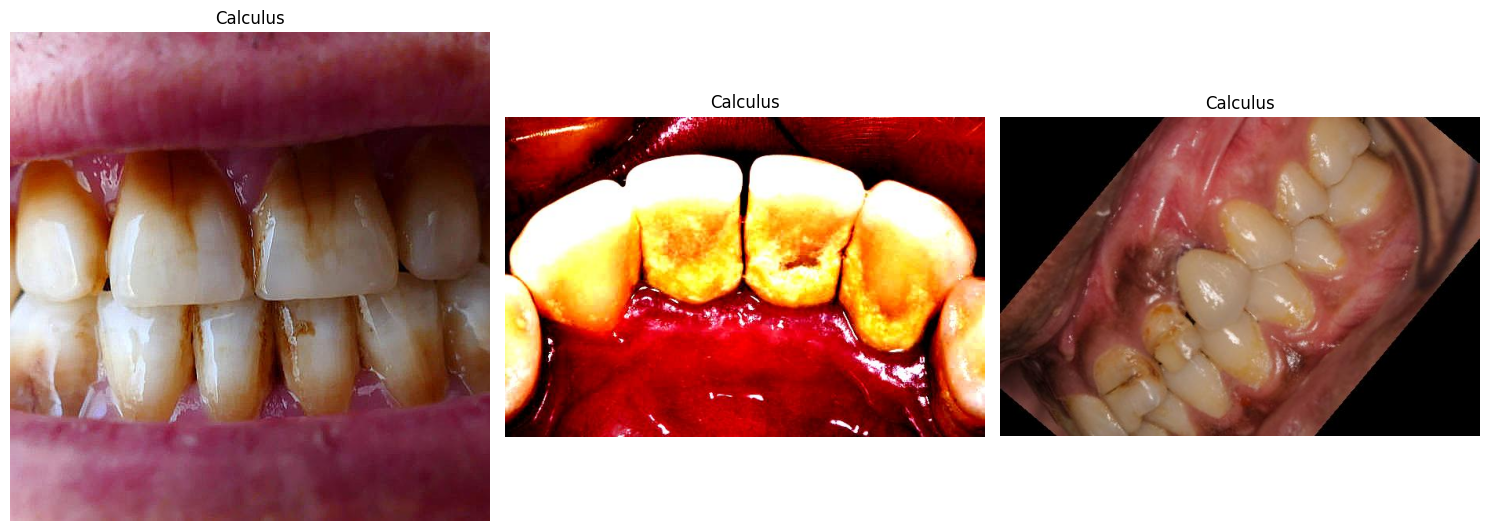

In [127]:
from PIL import Image
import random

def display_images(image_paths, cols=3, rows=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for img_path, ax in zip(image_paths, axes):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

data_dir = 'Train'
num_images_to_display = 3  # Number of images to display for each class

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        selected_images = random.sample(image_files, min(len(image_files), num_images_to_display))
        selected_image_paths = [os.path.join(class_dir, img) for img in selected_images]
        display_images(selected_image_paths, cols=num_images_to_display, rows=1)

# Baseline Model (RF and LR)

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from PIL import Image

def load_images(train_dir_, size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(train_dir_)

    for class_name in class_names:
        class_dir = os.path.join(train_dir_, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.array(img).flatten())
            labels.append(class_names.index(class_name))

    return np.array(images), np.array(labels), class_names

# Load and preprocess the data
train_dir_ = 'Train' 
X_train, y_train, class_names = load_images(train_dir_)

val_dir_ = 'Val'
X_val, y_val, class_names = load_images(val_dir_)

# Splitting dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance


X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


# Logistic Regression Model (as an example of a simpler model)
log_reg_model = LogisticRegression(max_iter=1000, solver= 'saga')
log_reg_model.fit(X_train_pca, y_train)
y_pred_lr = log_reg_model.predict(X_val_pca)
print("Logistic Regression Model Performance:")
print(classification_report(y_val, y_pred_lr, target_names=class_names))

'''

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_testval)
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

'''

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_val_pca)
print("Random Forest Model Performance:")
print(classification_report(y_val, y_pred_rf, target_names=class_names))

Logistic Regression Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.73      0.84      0.78       126
Tooth Discoloration       0.18      0.21      0.20        19
              Ulcer       0.56      0.74      0.63        27
         Gingivitis       0.73      0.60      0.66       235
             Caries       0.25      0.18      0.21        22
           Calculus       0.53      0.59      0.56       130

           accuracy                           0.63       559
          macro avg       0.50      0.53      0.51       559
       weighted avg       0.64      0.63      0.63       559

Random Forest Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.74      0.83      0.78       126
Tooth Discoloration       1.00      0.11      0.19        19
              Ulcer       1.00      0.33      0.50        27
         Gingivitis       0.63      0.76      0.69       235
         

## Data Augmentation

In [128]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 

# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

In [129]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 16017 images
 - Calculus: 2027 images (12.66% of train set)
 - Caries: 2797 images (17.46% of train set)
 - Gingivitis: 3597 images (22.46% of train set)
 - hypodontia: 1952 images (12.19% of train set)
 - Ulcer: 2813 images (17.56% of train set)
 - Tooth Discoloration: 2831 images (17.67% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


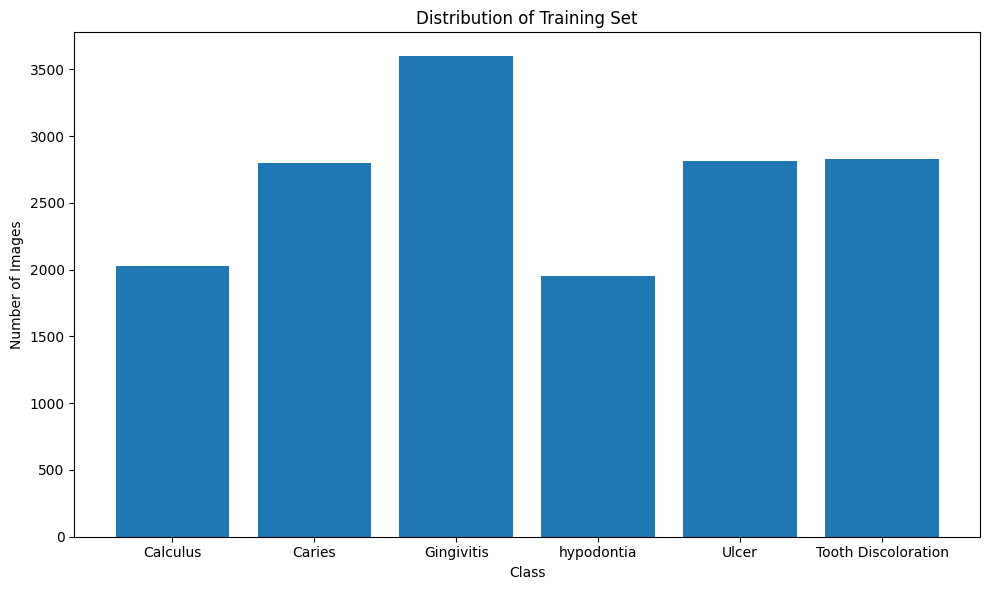

In [130]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

## Data Normalization Process

In [131]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder(root='Train', transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

mean = 0.
std = 0.
nb_samples = 0.
for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.6821, 0.4543, 0.4163])
Std: tensor([0.2039, 0.2245, 0.2088])


# Primary Model

In [132]:
import torch          
import torchvision   
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time

# Define the CNN Architecture
class OralCNN(nn.Module):
    def __init__(self):
        super(OralCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  #smaller kernel on first conv layer
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1) #bigger kernel on second layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)  
        self.fc2 = nn.Linear(512, 6)  # 6 classes
        self.dropout = nn.Dropout(0.25) #dropout for regularization
        self.name = "OralClassifier"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 30 * 30)  
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

mean = [0.6828, 0.4591, 0.4221]
std = [0.2034, 0.2248, 0.2094]

# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


model = OralCNN()

## Training 

In [133]:

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [134]:

def train_model(model, batch_size=64, learning_rate=0.01, num_epochs=3):
    torch.manual_seed(1000)

    # Use GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)



    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum= 0.9, weight_decay= 1e-8)

    #implementing weight decay with L2 regularization
    #optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 3)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers= 3)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()  # Start the timer

    for epoch in range(num_epochs):  # Loop over the dataset multiple times

        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        # Training
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):  # Iterate over the batches
            # Transfer data to the device
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)

        # Validation
        total_val_loss = 0.0
        total_val_err = 0.0
        total_epoch = 0

        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_epoch += labels.size(0)

        val_err[epoch] = float(total_val_err) / total_epoch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train acc: {100 - (train_err[epoch] * 100)}%, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation acc: {100 - (val_err[epoch] * 100)}%, Validation loss: {val_loss[epoch]:.4f}')

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time elapsed: {elapsed_time:.2f} seconds')

    # Save metrics
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)  
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)

In [86]:
train_model(model, batch_size=128, learning_rate=0.001, num_epochs=20)

Epoch 1/20, Train err: 0.6203, Train acc: 37.96654599925103%, Train loss: 1.5490, Validation err: 0.4508, Validation acc: 54.91949910554562%, Validation loss: 1.2040
Epoch 2/20, Train err: 0.4870, Train acc: 51.30445637248783%, Train loss: 1.2711, Validation err: 0.4240, Validation acc: 57.60286225402504%, Validation loss: 1.0580
Epoch 3/20, Train err: 0.4378, Train acc: 56.22269379603046%, Train loss: 1.1295, Validation err: 0.3900, Validation acc: 61.001788908765654%, Validation loss: 0.9825
Epoch 4/20, Train err: 0.3800, Train acc: 61.996005492447885%, Train loss: 1.0089, Validation err: 0.3453, Validation acc: 65.47406082289802%, Validation loss: 0.8817
Epoch 5/20, Train err: 0.3401, Train acc: 65.99051304456373%, Train loss: 0.9077, Validation err: 0.3292, Validation acc: 67.08407871198568%, Validation loss: 0.8630
Epoch 6/20, Train err: 0.3141, Train acc: 68.5931843714892%, Train loss: 0.8257, Validation err: 0.3184, Validation acc: 68.15742397137745%, Validation loss: 0.8053
Epo

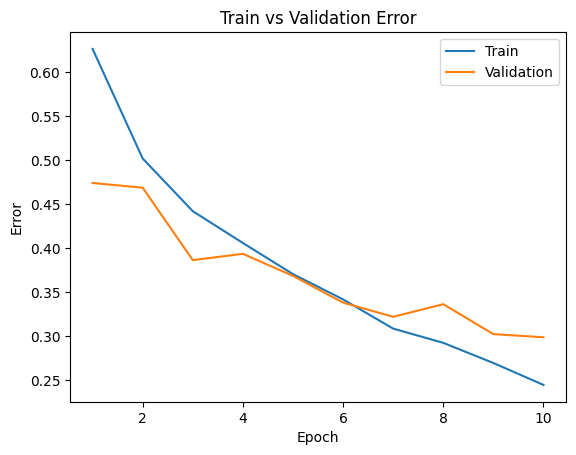

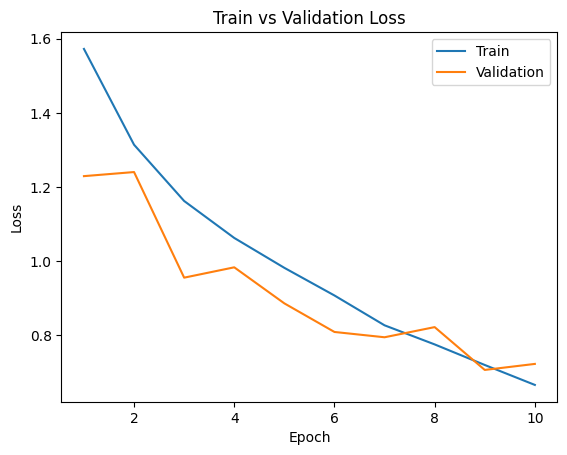

In [81]:
model_path = get_model_name("OralClassifier", batch_size= 128, learning_rate= 0.001, epoch=19)
plot_training_curve(model_path)

# AutoEncoder + Classifier Testing (Not Great)

In [29]:
'''
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1), # 128x128x3 -> 64x64x32
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 16x16x128
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 8x8x256
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 8x8x256 -> 16x16x128
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 64x64x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 128x128x3
            nn.Sigmoid()  # Output pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    '''


In [30]:
'''
# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

'''

In [27]:
'''

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(26*26*64, 512),  # Adjusted for the output of the autoencoder's encoder
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 6)  # 6 classes
        )

    def forward(self, x):
        x = x.view(-1, 26*26*64)  # Flatten the output of the encoder to fit the fully connected layer
        x = self.fc(x)
        return x
'''

In [ ]:
'''
# Function to train autoencoder
def train_autoencoder(autoencoder, train_loader, num_epochs=20):
    autoencoder.train()
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    losses = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            imgs, _ = data
            imgs = imgs.to(device)  # Move data to device
            
            optimizer.zero_grad()
            outputs = autoencoder(imgs)
            loss = criterion(outputs, imgs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * imgs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Autoencoder Training Loss')
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

autoencoder = Autoencoder().to(device)
train_autoencoder(autoencoder, train_loader)

'''

In [23]:
'''
def train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=20):
    classifier.train()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer = optim.Adam(classifier.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        # Training
        running_loss = 0.0
        correct = 0
        total = 0
        for data in train_loader:
            imgs, labels = data
            imgs, labels = imgs.to(device), labels.to(device)
            features = encoder(imgs).view(-1, 26*26*64)  # Adjusted for flattened output
            
            optimizer.zero_grad()
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(running_loss / total)
        train_accuracy.append(correct / total)
        
        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        classifier.eval()
        with torch.no_grad():
            for data in val_loader:
                imgs, labels = data
                imgs, labels = imgs.to(device), labels.to(device)
                features = encoder(imgs).view(-1, 26*26*64)
                outputs = classifier(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_losses.append(val_loss / total)
        val_accuracy.append(correct / total)
        
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy[-1]*100:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracy[-1]*100:.2f}%')

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = Classifier().to(device)
# Make sure the encoder is in eval

'''

In [ ]:
'''

# Setting the device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = autoencoder.encoder
encoder.eval()  # Set the encoder to evaluation mode


classifier = Classifier().to(device)


train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=10)

'''

# Optimized CNN Architecture

In [19]:
class OralCNNEnhanced(nn.Module):
    def __init__(self):
        super(OralCNNEnhanced, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization after Conv1
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization after Conv2
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)
        self.bn3 = nn.BatchNorm1d(512)  # Batch Normalization before the first fully connected layer
        self.fc2 = nn.Linear(512, 6)
        self.dropout = nn.Dropout(0.25)
        self.name = "OralClassifierEnhanced"

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 30 * 30)
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
optim_model = OralCNNEnhanced()

train_model(optim_model, batch_size=128, learning_rate= 0.001, num_epochs=15)

# Transfer Learning Alex Net

In [20]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:

# Define a transform to preprocess the images
transform2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = torchvision.datasets.ImageFolder('Train', transform = transform2)
val_dataset = torchvision.datasets.ImageFolder('Val', transform = transform2)
test_dataset = torchvision.datasets.ImageFolder('Test', transform = transform2)

feature_path = 'Features/'


train_loader2 = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=2)
val_loader2 = DataLoader(dataset=val_dataset, batch_size=1, shuffle=False, num_workers=2)
test_loader2 = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, num_workers=2)

classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Tooth Discoloration', 'Ulcer']

# Function to compute and save features for a given dataloader
def compute_and_save_features(loader, sets):
    for images, labels in loader:
        
        features = alexnet.features(images)
        features = torch.from_numpy(features.detach().numpy())
        
        label_str = classes[labels.item()]  # Convert label to string based on classes list
        save_dir = os.path.join(feature_path, sets, label_str)
        
        # Ensure the directory exists
        os.makedirs(save_dir, exist_ok=True)
        
        # Save the feature tensor
        feature_file = os.path.join(save_dir, f'{len(os.listdir(save_dir))}.tensor')
        torch.save(features.squeeze(0), feature_file)

# Compute and save features for train, val, and test datasets
compute_and_save_features(train_loader2, 'Train')
compute_and_save_features(val_loader2, 'Val')
compute_and_save_features(test_loader2, 'Test')


In [47]:
t_path = 'Features/Train'
v_path = 'Features/Val'
test_path = 'Features/Test'

train_dataset_features = torchvision.datasets.DatasetFolder(t_path, loader=torch.load, extensions=('.tensor'))
val_dataset_features = torchvision.datasets.DatasetFolder(v_path, loader=torch.load, extensions=('.tensor'))
test_dataset_features = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))


load_train_features = DataLoader(dataset=train_dataset_features, batch_size=64, shuffle=True, num_workers=2)
load_v_features = DataLoader(dataset=val_dataset_features, batch_size=64, shuffle=True, num_workers=2)
load_test_features = DataLoader(dataset=test_dataset_features, batch_size=64, shuffle=True, num_workers=2)

In [48]:
dataiter = iter(load_train_features)
features, labels = next(dataiter)
print(features.shape)
print(labels.shape)

torch.Size([64, 256, 6, 6])
torch.Size([64])


In [54]:
class ModifiedAlexNet(nn.Module):
    def __init__(self):
        super(ModifiedAlexNet, self).__init__()
        # Add one convolutional layer
        self.conv1 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        # Add one pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout layer after pooling
        self.dropout1 = nn.Dropout(0.25)
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 128) # Adjusted for the output size after conv and pool
        self.dropout2 = nn.Dropout(0.5)  # Higher dropout rate before the final layer
        self.fc2 = nn.Linear(128, 6) # 6 classes as the output
        self.name = "modified_alexnet"

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout1(x)  # Apply dropout after pooling
        x = x.view(-1, 128 * 3 * 3)  # Flatten the features
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)  # Apply dropout before the final layer
        x = self.fc2(x)
        return x

In [303]:
import torch.optim as optim
import time
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns


def train_model_transfer(model, train_loader, val_loader, batch_size = 64, learning_rate = 0.001, num_epochs=5):

    # Use GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    ########################################################################
    # Train a classifier on Oral Disease Classification
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Multi-class classification
    #optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay= 1e-6)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay= 1e-4) 
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
    ########################################################################
    # Set up some numpy arrays to store the training/validation loss/error
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    start_time = time.time()
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        model.train()
        #Training phase
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)


        model.eval()
        #Validation phase
        total_val_loss = 0.0
        total_val_err = 0.0
        total_epoch = 0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_epoch += labels.size(0)

                all_preds.extend(predicted.view(-1).cpu().numpy())
                all_labels.extend(labels.view(-1).cpu().numpy())

        val_err[epoch] = float(total_val_err) / total_epoch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)



        print(f'Epoch {epoch+1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}')

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time elapsed: {elapsed_time:.2f} seconds')

    #Save train/validation metrics to CSV files
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

    # Calculate precision, recall, f1 after training
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

    idx_class = {0: 'Calculus',
 1: 'Caries',
 2: 'Gingivitis',
 3: 'Tooth Discoloration',
 4: 'Ulcer',
 5: 'hypodontia'}
    
    class_names = [idx_class[i] for i in range(len(idx_class))]

    # Plot confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    def plot_confusion_matrix(cm, class_names):
        """
        Plots a confusion matrix using seaborn's heatmap.
        """
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    plot_confusion_matrix(conf_matrix, class_names)





In [56]:
learning_rate = 0.005
num_epochs = 15

alex = ModifiedAlexNet()

train_model_transfer(alex, load_train_features, load_v_features, 64, learning_rate, num_epochs)

Epoch 1/15, Train err: 0.4380, Train loss: 1.0841, Validation err: 0.3345, Validation loss: 0.8302
Epoch 2/15, Train err: 0.3146, Train loss: 0.7744, Validation err: 0.2809, Validation loss: 0.6671
Epoch 3/15, Train err: 0.2718, Train loss: 0.6632, Validation err: 0.2576, Validation loss: 0.6213
Epoch 4/15, Train err: 0.2469, Train loss: 0.5892, Validation err: 0.2665, Validation loss: 0.6637
Epoch 5/15, Train err: 0.2156, Train loss: 0.5258, Validation err: 0.2487, Validation loss: 0.6020
Epoch 6/15, Train err: 0.1985, Train loss: 0.4712, Validation err: 0.2361, Validation loss: 0.5760
Epoch 7/15, Train err: 0.1787, Train loss: 0.4278, Validation err: 0.2361, Validation loss: 0.5957
Epoch 8/15, Train err: 0.1696, Train loss: 0.3927, Validation err: 0.2147, Validation loss: 0.5659
Epoch 9/15, Train err: 0.1518, Train loss: 0.3512, Validation err: 0.1932, Validation loss: 0.5587
Epoch 10/15, Train err: 0.1465, Train loss: 0.3385, Validation err: 0.2147, Validation loss: 0.5712
Epoch 11/

# Transfer Learning P2 InceptionV3

In [5]:
from torchvision import models
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inception = models.inception_v3(pretrained=True, aux_logits=True)  # Disable auxiliary logits
inception.fc = nn.Identity()
inception = inception.to(device)


/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [78]:
# Data augmentation and normalization for training
inception_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((299, 299)),  # Inception models expect 299x299 inputs
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [85]:
train_dataset = torchvision.datasets.ImageFolder('Train', transform = inception_transforms)
val_dataset = torchvision.datasets.ImageFolder('Val', transform = inception_transforms)
test_dataset = torchvision.datasets.ImageFolder('Test', transform = inception_transforms)




train_loader_3 = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=2)
val_loader_3 = DataLoader(dataset=val_dataset, batch_size=1, shuffle=False, num_workers=2)
test_loader_3 = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, num_workers=2)



classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Tooth Discoloration', 'Ulcer']

def compute_and_save_features_inception(loader, feature_path, dataset_type):
    inception.eval()  # Set model to evaluation mode
    for images, labels in loader:
        # Move images to the device
        images = images.to(device)
        with torch.no_grad():  # Ensuring no gradient computation
            features = inception(images)
        
        # Convert labels to class names, assuming classes list is defined
        label_str = classes[labels.item()]
        save_dir = os.path.join(feature_path, dataset_type, label_str)
        os.makedirs(save_dir, exist_ok=True)
        
        feature_file = os.path.join(save_dir, f'{len(os.listdir(save_dir))}.tensor')
        torch.save(features.cpu().squeeze(0), feature_file)  # Move features back to CPU if necessary

# Compute and save features
feature_path = 'Features_Inception/'
compute_and_save_features_inception(train_loader_3, feature_path, 'Train')
compute_and_save_features_inception(val_loader_3, feature_path, 'Val')
compute_and_save_features_inception(test_loader_3, feature_path, 'Test')





In [86]:
t_path = 'Features_Inception/Train'
v_path = 'Features_Inception/Val'
test_path = 'Features_Inception/Test'

train_dataset_features = torchvision.datasets.DatasetFolder(t_path, loader=torch.load, extensions=('.tensor'))
val_dataset_features = torchvision.datasets.DatasetFolder(v_path, loader=torch.load, extensions=('.tensor'))
test_dataset_features = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))


load_train_features = DataLoader(dataset=train_dataset_features, batch_size=64, shuffle=True, num_workers=2)
load_v_features = DataLoader(dataset=val_dataset_features, batch_size=64, shuffle=True, num_workers=2)
load_test_features = DataLoader(dataset=test_dataset_features, batch_size=64, shuffle=True, num_workers=2)

In [87]:
dataiter = iter(load_train_features)
features, labels = next(dataiter)
print(features.shape)
print(labels.shape)

torch.Size([64, 2048])
torch.Size([64])


In [102]:
class FeatureClassifier(nn.Module):
    def __init__(self, input_size=2048, num_classes=6):
        super(FeatureClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.25)
        self.name = "Inception"
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [108]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_inception = FeatureClassifier().to(device)

train_model_transfer(model_inception, load_train_features, load_v_features, 64, 0.005, 20)

Epoch 1/20, Train err: 0.3924, Train loss: 1.1209, Validation err: 0.3381, Validation loss: 0.7867
Epoch 2/20, Train err: 0.2989, Train loss: 0.7294, Validation err: 0.3148, Validation loss: 0.6853
Epoch 3/20, Train err: 0.2774, Train loss: 0.6794, Validation err: 0.2755, Validation loss: 0.5976
Epoch 4/20, Train err: 0.2712, Train loss: 0.6405, Validation err: 0.2540, Validation loss: 0.6111
Epoch 5/20, Train err: 0.2548, Train loss: 0.6024, Validation err: 0.2540, Validation loss: 0.6242
Epoch 6/20, Train err: 0.2416, Train loss: 0.5729, Validation err: 0.2451, Validation loss: 0.5979
Epoch 7/20, Train err: 0.2396, Train loss: 0.5748, Validation err: 0.2343, Validation loss: 0.5570
Epoch 8/20, Train err: 0.2187, Train loss: 0.5212, Validation err: 0.2397, Validation loss: 0.5815
Epoch 9/20, Train err: 0.2145, Train loss: 0.5224, Validation err: 0.2308, Validation loss: 0.5354
Epoch 10/20, Train err: 0.2010, Train loss: 0.4811, Validation err: 0.2487, Validation loss: 0.5610


# Transfer Learning P3 ResNet50

In [3]:
resnet_trans = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=resnet_trans)
val_dataset = ImageFolder(root='Val', transform=resnet_trans)

train_loader_4 = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers = 3)
val_loader_4= DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers= 3)

In [6]:
# Load the pretrained ResNet50 model
resnet50 = models.resnet50(pretrained=True)
resnet50.fc = nn.Identity()  # Remove the final fully connected layer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)
resnet50.eval()

def extract_features(data_loader):
    features = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            output = resnet50(inputs)
            features.append(output)
            labels_list.append(labels)
    
    features = torch.cat(features).cpu()
    labels = torch.cat(labels_list).cpu()
    return features, labels



train_features, train_labels = extract_features(train_loader_4)
val_features, val_labels = extract_features(val_loader_4)

/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [190]:
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 750)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.35)
        self.fc2 = nn.Linear(750, num_classes)
        self.name = "ResNet50"
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the classifier
input_dim = 2048  # For ResNet50
num_classes = 6  # Adjust based on your dataset
classifier_res = Classifier(input_dim, num_classes).to(device)

In [50]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)

# DataLoader
train_loader_res = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader_res = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [51]:
train_model_transfer(classifier_res, train_loader_res, val_loader_res, 64, 0.001, 10 )

Epoch 1/10, Train err: 0.3129, Train loss: 0.8227, Validation err: 0.3005, Validation loss: 0.7032
Epoch 2/10, Train err: 0.2194, Train loss: 0.5686, Validation err: 0.2701, Validation loss: 0.6614
Epoch 3/10, Train err: 0.1923, Train loss: 0.4975, Validation err: 0.2844, Validation loss: 0.7109
Epoch 4/10, Train err: 0.1786, Train loss: 0.4439, Validation err: 0.2469, Validation loss: 0.5870
Epoch 5/10, Train err: 0.1564, Train loss: 0.3922, Validation err: 0.2397, Validation loss: 0.5578
Epoch 6/10, Train err: 0.1487, Train loss: 0.3726, Validation err: 0.2272, Validation loss: 0.5277
Epoch 7/10, Train err: 0.1385, Train loss: 0.3440, Validation err: 0.2397, Validation loss: 0.6101
Epoch 8/10, Train err: 0.1356, Train loss: 0.3246, Validation err: 0.2272, Validation loss: 0.5533
Epoch 9/10, Train err: 0.1256, Train loss: 0.3119, Validation err: 0.2397, Validation loss: 0.5310
Epoch 10/10, Train err: 0.1231, Train loss: 0.2948, Validation err: 0.2093, Validation loss: 0.5280
Finished 

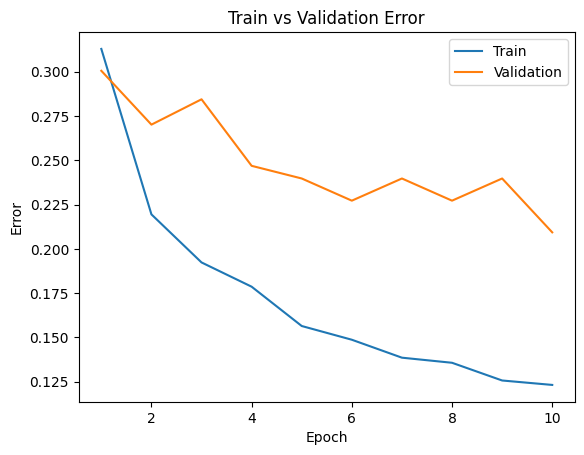

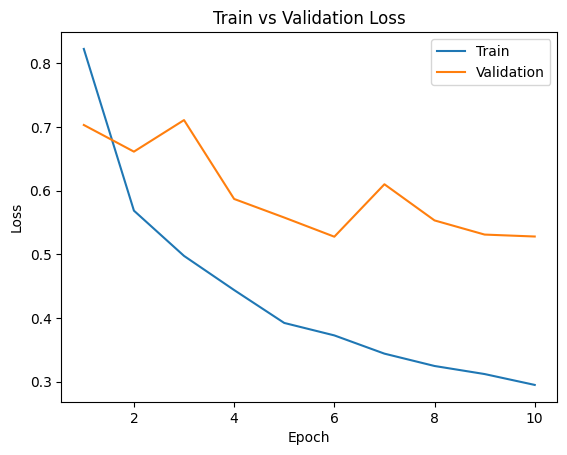

In [52]:
model_path_res = get_model_name("ResNet50", batch_size= 64, learning_rate= 0.001, epoch=9)
plot_training_curve(model_path_res)

# Transfer Learning P4 EfficientNet

In [217]:
mean = [0.6828, 0.4591, 0.4221]
std = [0.2034, 0.2248, 0.2094]

# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset_e = ImageFolder(root='Train', transform=common_transforms)
val_dataset_e = ImageFolder(root='Val', transform=common_transforms)

In [218]:
from efficientnet_pytorch import EfficientNet

# Load a pre-trained EfficientNet model
model_name = 'efficientnet-b0'  # Choose from efficientnet-b0 to efficientnet-b7
efficientnet = EfficientNet.from_pretrained(model_name)
efficientnet.eval()  # Set the model to evaluation mode

# Modify the model to remove the final classifier layer
features_bottleneck = efficientnet._fc.in_features
efficientnet._fc = torch.nn.Identity()

train_loader_5 = DataLoader(train_dataset_e, batch_size=64, shuffle=True, num_workers = 2)
val_loader_5 = DataLoader(val_dataset_e, batch_size=64, shuffle=False, num_workers= 2)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet = efficientnet.to(device)

def extract_features(data_loader):
    all_features = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            features = efficientnet(inputs)
            all_features.append(features.cpu())
            all_labels.append(labels)
    return torch.cat(all_features), torch.cat(all_labels)

# Extract features
train_features, train_labels = extract_features(train_loader_5)
val_features, val_labels = extract_features(val_loader_5)

Loaded pretrained weights for efficientnet-b0


In [281]:
class SimplifiedClassifier(nn.Module):
    def __init__(self, input_size=1280, num_classes=6):
        super(SimplifiedClassifier, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.4)
        
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)
        
        self.fc4 = nn.Linear(128, num_classes)
        self.name = "EfficientNet"

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        return x



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_efficientNet = SimplifiedClassifier(input_size= 1280, num_classes=6).to(device)

In [282]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)

train_feature_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_feature_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Epoch 1/10, Train err: 0.4263, Train loss: 1.1271, Validation err: 0.3148, Validation loss: 0.7259
Epoch 2/10, Train err: 0.2256, Train loss: 0.5843, Validation err: 0.2469, Validation loss: 0.5813
Epoch 3/10, Train err: 0.1726, Train loss: 0.4456, Validation err: 0.2308, Validation loss: 0.5208
Epoch 4/10, Train err: 0.1417, Train loss: 0.3630, Validation err: 0.2093, Validation loss: 0.5030
Epoch 5/10, Train err: 0.1288, Train loss: 0.3193, Validation err: 0.2147, Validation loss: 0.4675
Epoch 6/10, Train err: 0.1136, Train loss: 0.2845, Validation err: 0.1932, Validation loss: 0.4508
Epoch 7/10, Train err: 0.1076, Train loss: 0.2596, Validation err: 0.1843, Validation loss: 0.4343
Epoch 8/10, Train err: 0.0967, Train loss: 0.2361, Validation err: 0.2004, Validation loss: 0.4492
Epoch 9/10, Train err: 0.0895, Train loss: 0.2157, Validation err: 0.1735, Validation loss: 0.4387
Epoch 10/10, Train err: 0.0867, Train loss: 0.2069, Validation err: 0.1825, Validation loss: 0.4314
Finished 

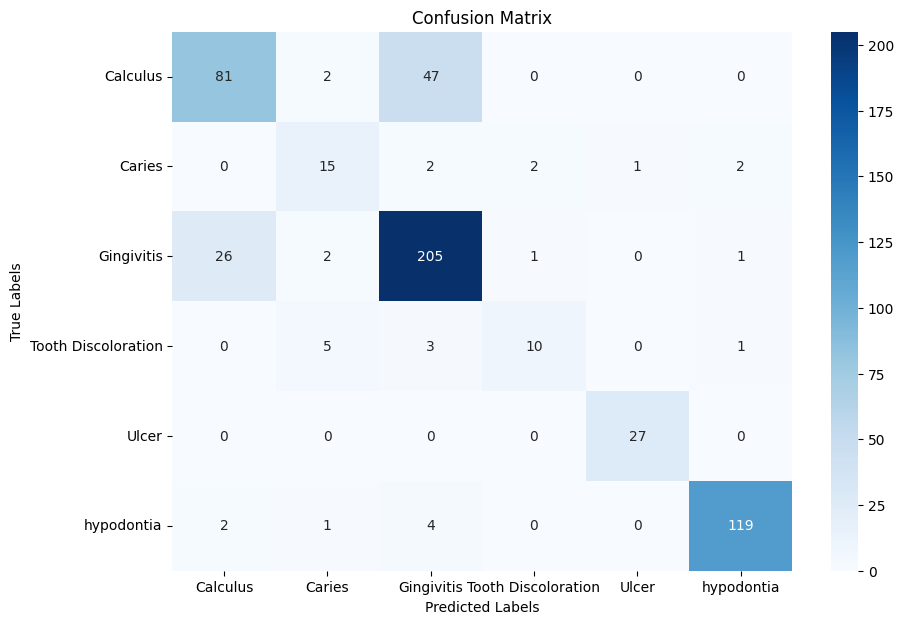

In [283]:
train_model_transfer(model_efficientNet, train_feature_loader, val_feature_loader, 32, 0.0001, 10)

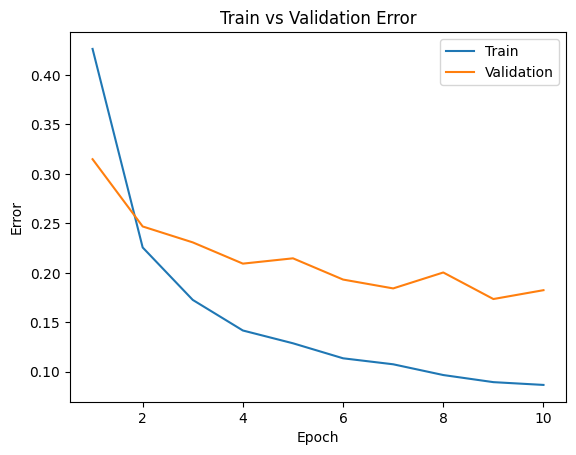

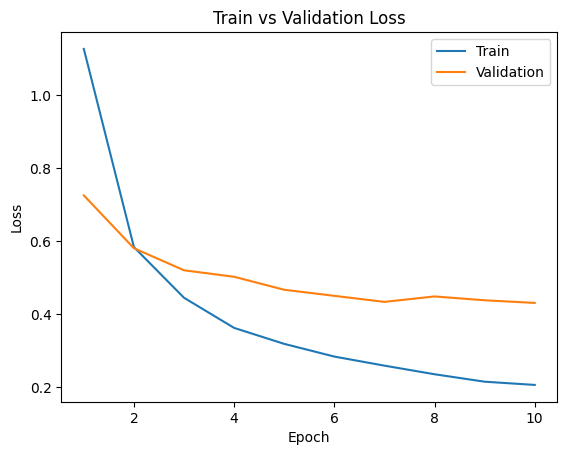

In [284]:
model_path_res = get_model_name("EfficientNet", batch_size= 32, learning_rate= 0.0001, epoch=9)
plot_training_curve(model_path_res)

# Transfer Learning P5 VIT followed by Classifier

In [273]:
import timm
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ViTFeatureExtractor(nn.Module):
    def __init__(self):
        super(ViTFeatureExtractor, self).__init__()
        self.model = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.model.head = nn.Identity()

    def forward(self, x):
        return self.model(x)

feature_extractor = ViTFeatureExtractor().to(device)

# Assuming the same transform as before
transform_VIT = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset_VIT = datasets.ImageFolder('Train', transform=transform_VIT)
train_loader_VIT = DataLoader(train_dataset_VIT, batch_size=32, shuffle=True)

val_dataset_VIT = datasets.ImageFolder('Val', transform=transform_VIT)
val_loader_VIT = DataLoader(val_dataset_VIT, batch_size=32, shuffle=False)


def extract_features(model, loader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            features.append(output)
            labels.append(y)
    return torch.cat(features).cpu(), torch.cat(labels).cpu()

train_features_VIT, train_labels_VIT = extract_features(feature_extractor, train_loader_VIT)
val_features_VIT, val_labels_VIT = extract_features(feature_extractor, val_loader_VIT)


In [285]:
class ClassifierVIT(nn.Module):
    def __init__(self, num_features=768, num_classes=6):
        super(ClassifierVIT, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)
        self.name = "VIT"
    
    def forward(self, x):
        return self.fc(x)

classifier_VIT = ClassifierVIT(num_features=768, num_classes=6).to(device)


# Convert extracted features and labels into TensorDataset for DataLoader
from torch.utils.data import TensorDataset

train_feat_dataset_VIT = TensorDataset(train_features_VIT, train_labels_VIT.long())
train_feat_loader_VIT = DataLoader(train_feat_dataset_VIT, batch_size=32, shuffle=True)

val_feat_dataset_VIT = TensorDataset(val_features_VIT, val_labels_VIT.long())
val_feat_loader_VIT = DataLoader(val_feat_dataset_VIT, batch_size=32, shuffle=False)

Epoch 1/25, Train err: 0.4019, Train loss: 1.1045, Validation err: 0.3256, Validation loss: 0.8400
Epoch 2/25, Train err: 0.2377, Train loss: 0.6982, Validation err: 0.2809, Validation loss: 0.7101
Epoch 3/25, Train err: 0.1976, Train loss: 0.5853, Validation err: 0.2683, Validation loss: 0.6752
Epoch 4/25, Train err: 0.1801, Train loss: 0.5236, Validation err: 0.2648, Validation loss: 0.6392
Epoch 5/25, Train err: 0.1654, Train loss: 0.4812, Validation err: 0.2487, Validation loss: 0.6156
Epoch 6/25, Train err: 0.1546, Train loss: 0.4505, Validation err: 0.2326, Validation loss: 0.5716
Epoch 7/25, Train err: 0.1467, Train loss: 0.4251, Validation err: 0.2397, Validation loss: 0.5790
Epoch 8/25, Train err: 0.1425, Train loss: 0.4063, Validation err: 0.2272, Validation loss: 0.5658
Epoch 9/25, Train err: 0.1367, Train loss: 0.3888, Validation err: 0.2272, Validation loss: 0.5574
Epoch 10/25, Train err: 0.1330, Train loss: 0.3750, Validation err: 0.2147, Validation loss: 0.5356
Epoch 11/

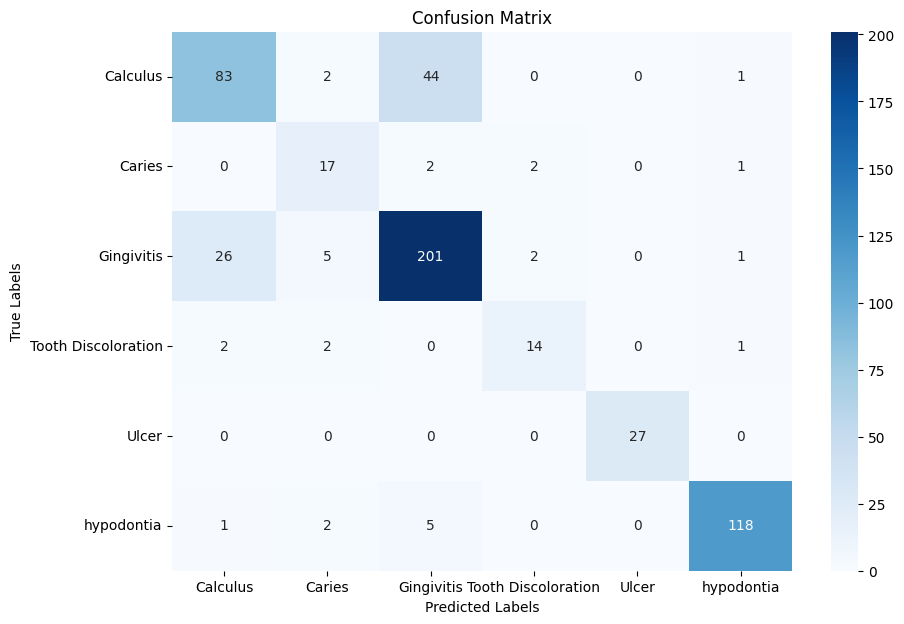

In [286]:
train_model_transfer(classifier_VIT, train_feat_loader_VIT, val_feat_loader_VIT, 32, 0.0001, 25)

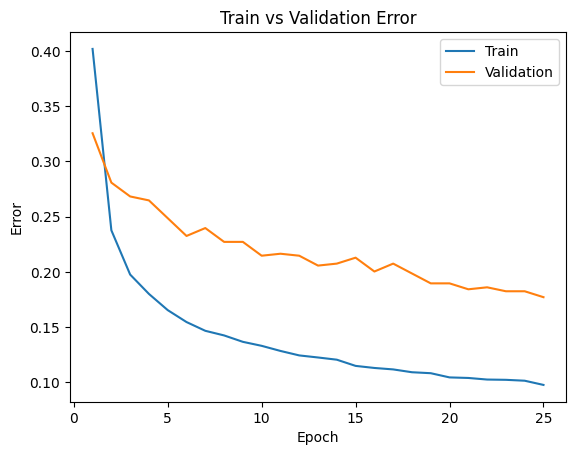

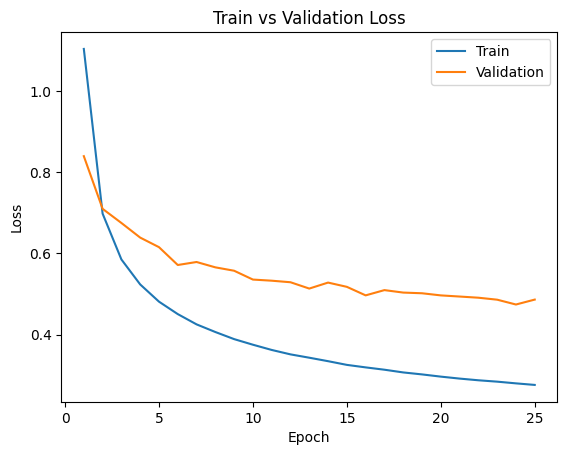

In [287]:
model_path_res = get_model_name("VIT", batch_size= 32, learning_rate= 0.0001, epoch=24)
plot_training_curve(model_path_res) 

# Transfer Learning P6 VGG19

In [195]:
vgg19 = models.vgg19(pretrained=True)
vgg19.classifier = nn.Sequential(*list(vgg19.classifier.children())[:-1])
vgg19.eval()  # Set to evaluation mode

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg19.to(device)

/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/yusufmoola/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:14<00:00, 39.9MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [277]:
transform_VGG = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset_VGG = datasets.ImageFolder('Train', transform=transform_VGG)
train_loader_VGG = DataLoader(train_dataset_VGG, batch_size=32, shuffle=True)

val_dataset_VGG = datasets.ImageFolder('Val', transform=transform_VGG)
val_loader_VGG = DataLoader(val_dataset_VGG, batch_size=32, shuffle=False)

idx_to_class = {v: k for k, v in train_dataset_VGG.class_to_idx.items()}

idx_to_class


{0: 'Calculus',
 1: 'Caries',
 2: 'Gingivitis',
 3: 'Tooth Discoloration',
 4: 'Ulcer',
 5: 'hypodontia'}

In [ ]:
def extract_features(model, loader, device):
    model.eval()  
    features = []
    labels = []
    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            features.append(output)
            labels.append(y)
    features = torch.cat(features).cpu()
    labels = torch.cat(labels).cpu()
    return features, labels

# Assuming train_loader and val_loader are defined and loaded with your datasets
train_features_VGG, train_labels = extract_features(vgg19, train_loader_VGG, device)
val_features_VGG, val_labels = extract_features(vgg19, val_loader_VGG, device)


In [ ]:
# Create TensorDatasets
train_feat_dataset = TensorDataset(train_features_VGG, train_labels)
val_feat_dataset = TensorDataset(val_features_VGG, val_labels)

# Create DataLoaders
train_feat_loader = DataLoader(train_feat_dataset, batch_size=32, shuffle=True)
val_feat_loader = DataLoader(val_feat_dataset, batch_size=32, shuffle=False)

In [207]:
class Classifier_VGG(nn.Module):
    def __init__(self, num_features, num_classes=6):
        super(Classifier_VGG, self).__init__()
        self.fc1 = nn.Linear(num_features, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, num_classes)
        self.name = "VGG"
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the classifier
classifier_VGG = Classifier_VGG(num_features=4096, num_classes=6).to(device)

In [208]:
train_model_transfer(classifier_VGG, train_feat_loader, val_feat_loader, 32, 0.0001, 15)

Epoch 1/15, Train err: 0.2668, Train loss: 0.7426, Validation err: 0.2433, Validation loss: 0.6188
Epoch 2/15, Train err: 0.1709, Train loss: 0.4617, Validation err: 0.2469, Validation loss: 0.5530
Epoch 3/15, Train err: 0.1400, Train loss: 0.3700, Validation err: 0.2487, Validation loss: 0.5330
Epoch 4/15, Train err: 0.1190, Train loss: 0.3129, Validation err: 0.2433, Validation loss: 0.5441
Epoch 5/15, Train err: 0.1065, Train loss: 0.2727, Validation err: 0.2254, Validation loss: 0.5238
Epoch 6/15, Train err: 0.0922, Train loss: 0.2417, Validation err: 0.2254, Validation loss: 0.5201
Epoch 7/15, Train err: 0.0835, Train loss: 0.2180, Validation err: 0.2218, Validation loss: 0.5230
Epoch 8/15, Train err: 0.0753, Train loss: 0.1973, Validation err: 0.2236, Validation loss: 0.5273
Epoch 9/15, Train err: 0.0696, Train loss: 0.1804, Validation err: 0.2200, Validation loss: 0.5448
Epoch 10/15, Train err: 0.0669, Train loss: 0.1681, Validation err: 0.2111, Validation loss: 0.5297
Epoch 11/

# Model Testing - Comp between VIT & EfficientNet

In [302]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

def evaluate_model(classifier_model, test_feat_loader, device):
    classifier_model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_feat_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = classifier_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')

    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    
    idx_class = {0: 'Calculus',
 1: 'Caries',
 2: 'Gingivitis',
 3: 'Tooth Discoloration',
 4: 'Ulcer',
 5: 'hypodontia'}
    
    class_names = [idx_class[i] for i in range(len(idx_class))]

    def plot_confusion_matrix(cm, class_names):
        """
        Plots a confusion matrix using seaborn's heatmap.
        """
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    plot_confusion_matrix(conf_matrix, class_names)
    
    
    
    



In [289]:
def extract_features(model, loader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            output = model(inputs)
            features.append(output)
            labels.append(y)
    return torch.cat(features).cpu(), torch.cat(labels).cpu()

## VIT Testing

In [290]:
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


test_dataset_final = datasets.ImageFolder('Test', transform=transform_test)
test_loader_final = DataLoader(test_dataset_final, batch_size=32, shuffle=False)


In [291]:
test_features_VIT, test_labels_VIT = extract_features(feature_extractor, test_loader_final)

In [292]:
test_feat_dataset_VIT = TensorDataset(test_features_VIT, test_labels_VIT.long())
test_feat_loader_VIT = DataLoader(test_feat_dataset_VIT, batch_size=32, shuffle=False)

In [295]:
classifier_VIT_Final = ClassifierVIT(num_features=768, num_classes=6).to(device)

model_path_test_VIT = get_model_name("VIT", batch_size= 32, learning_rate= 0.0001, epoch=24)

classifier_VIT_Final.load_state_dict(torch.load(model_path_test_VIT))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Accuracy: 80.58%
Precision: 0.7677
Recall: 0.8214
F1 Score: 0.7810


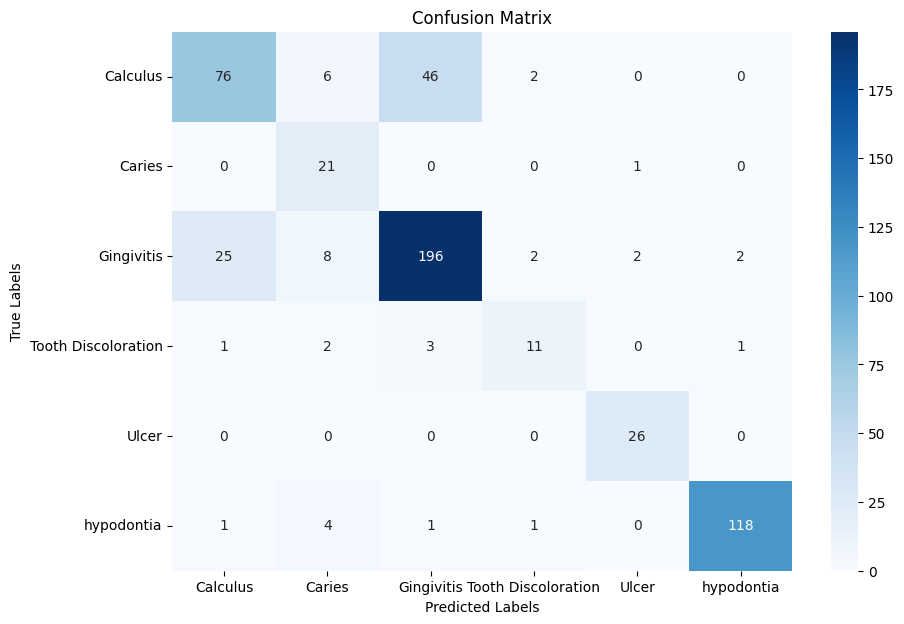

In [305]:
evaluate_model(classifier_VIT_Final, test_feat_loader_VIT, device)

## EfficientNet Testing

In [297]:
model_name = 'efficientnet-b0'  
efficientnet = EfficientNet.from_pretrained(model_name)
efficientnet.eval()  # Set the model to evaluation mode

# Modify the model to remove the final classifier layer
features_bottleneck = efficientnet._fc.in_features
efficientnet._fc = torch.nn.Identity()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet = efficientnet.to(device)

Loaded pretrained weights for efficientnet-b0


In [298]:
test_features_EN, test_labels_EN = extract_features(efficientnet, test_loader_final)

In [299]:
test_feat_dataset_EN = TensorDataset(test_features_EN, test_labels_EN.long())
test_feat_loader_EN = DataLoader(test_feat_dataset_EN, batch_size=32, shuffle=False)

In [300]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

efficientNet_test = SimplifiedClassifier(input_size= 1280, num_classes=6).to(device)

model_path_EN_test = get_model_name("EfficientNet", batch_size= 32, learning_rate= 0.0001, epoch=9)

efficientNet_test.load_state_dict(torch.load(model_path_EN_test))

<All keys matched successfully>

Accuracy: 78.78%
Precision: 0.8088
Recall: 0.7003
F1 Score: 0.7166


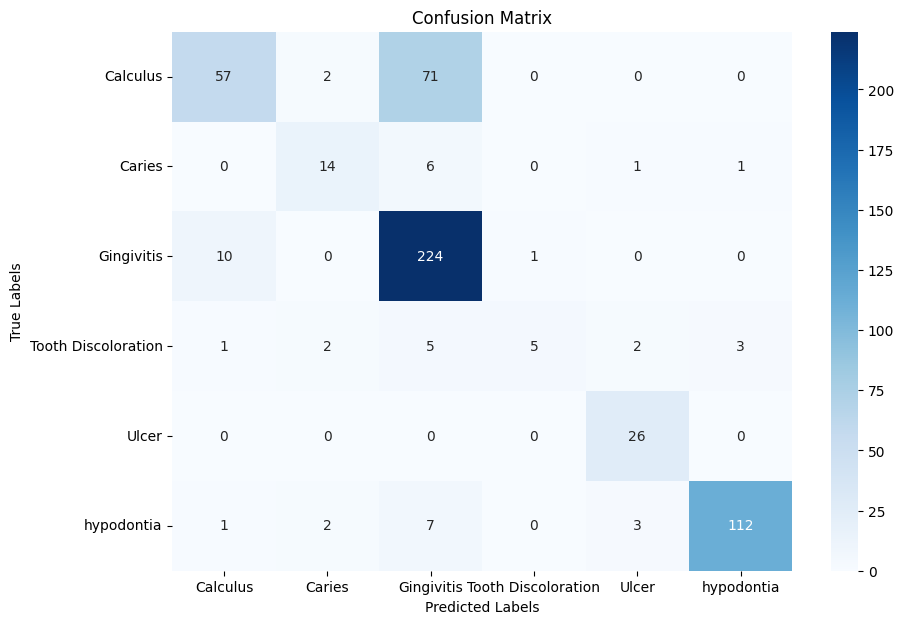

In [304]:
evaluate_model(efficientNet_test, test_feat_loader_EN, device)